<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-24 08:53:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   207MB/s    in 0.5s    

2023-05-24 08:53:50 (207 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


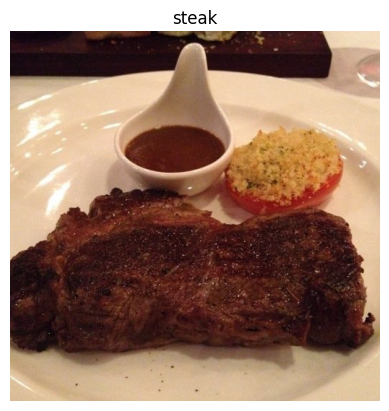

In [9]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[ 24,   7,  25],
        [ 24,   7,  25],
        [ 22,   8,  25],
        ...,
        [237, 221, 187],
        [237, 223, 188],
        [239, 225, 190]],

       [[ 23,   9,  26],
        [ 22,   8,  25],
        [ 21,   7,  22],
        ...,
        [237, 221, 187],
        [237, 223, 188],
        [238, 224, 189]],

       [[ 22,   8,  23],
        [ 21,   7,  22],
        [ 20,   6,  21],
        ...,
        [239, 223, 189],
        [238, 224, 189],
        [239, 225, 190]],

       ...,

       [[221, 188, 153],
        [221, 188, 153],
        [221, 188, 153],
        ...,
        [221, 195, 158],
        [219, 194, 154],
        [219, 194, 154]],

       [[219, 186, 151],
        [220, 187, 152],
        [220, 187, 152],
        ...,
        [220, 194, 157],
        [218, 193, 153],
        [219, 194, 154]],

       [[217, 184, 149],
        [218, 185, 150],
        [219, 186, 151],
        ...,
        [220, 194, 157],
        [222, 197, 157],
        [226, 201, 161]]

In [11]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.09411765, 0.02745098, 0.09803922],
        [0.09411765, 0.02745098, 0.09803922],
        [0.08627451, 0.03137255, 0.09803922],
        ...,
        [0.92941176, 0.86666667, 0.73333333],
        [0.92941176, 0.8745098 , 0.7372549 ],
        [0.9372549 , 0.88235294, 0.74509804]],

       [[0.09019608, 0.03529412, 0.10196078],
        [0.08627451, 0.03137255, 0.09803922],
        [0.08235294, 0.02745098, 0.08627451],
        ...,
        [0.92941176, 0.86666667, 0.73333333],
        [0.92941176, 0.8745098 , 0.7372549 ],
        [0.93333333, 0.87843137, 0.74117647]],

       [[0.08627451, 0.03137255, 0.09019608],
        [0.08235294, 0.02745098, 0.08627451],
        [0.07843137, 0.02352941, 0.08235294],
        ...,
        [0.9372549 , 0.8745098 , 0.74117647],
        [0.93333333, 0.87843137, 0.74117647],
        [0.9372549 , 0.88235294, 0.74509804]],

       ...,

       [[0.86666667, 0.7372549 , 0.6       ],
        [0.86666667, 0.7372549 , 0.6       ],
        [0.86666667, 0

## An end to end example
Let's build an End to end Neural Network
* Load our images
* preprocess
* Build CNN to find patterns
* Compile the CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (Get all the pixel values to be between 0 &1, also called normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 245ms/step - loss: 0.6285 - accuracy: 0.6593 - val_loss: 0.4770 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4987 - accuracy: 0.7687 - val_loss: 0.4673 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4295 - accuracy: 0.8093 - val_loss: 0.3610 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3914 - accuracy: 0.8267 - val_loss: 0.3712 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3822 - accuracy: 0.8440 - val_loss: 0.3531 - val_accuracy: 0.8480


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
#Using the sae model as before with the different dataset

In [15]:
tf.random.set_seed(42)

#Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 1.0587 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 3.3771 - accuracy: 0.6313 - val_loss: 0.5692 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.7103 - accuracy: 0.7340 - val_loss: 0.6366 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.7347 - accuracy: 0.7207 - val_loss: 0.4402 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.5523 - accuracy: 0.7607 - val_loss: 0.5393 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.5083 - accuracy: 0.7753 - val_loss: 0.5831 - val_accuracy: 0.6980


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Even though there are less number of features/parameters in the Model 1 or any model in General, it is better in to decypher the patterns in the data. This is against the theory of more is better.


## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data.
(prepare it for th model, the main step here is scaling/normalizing)
3. Created a model (started with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different params and improve the model
7. Repeat iuntil satisfied

### 1. Become one with the data

Image shape: (512, 382, 3)
Image shape: (512, 512, 3)


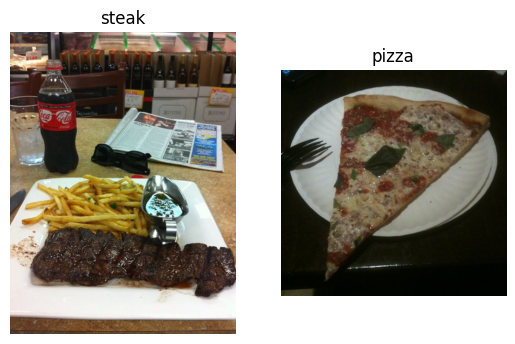

In [19]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
#Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is turning our data into **batches**

A batch is a small subset of the data. Rather than look at all ~10k images at a time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit coud result in the model not being able to learn very well.

Why 32??

Because 32 is good.

In [21]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in out image data from the directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#Get a sample of training data batch
images, labels=train_data.next() #Get the next batch of images in train_data
len(images), len(labels)

(32, 32)

In [24]:
#How many batches are there
len(train_data) #1500/32

47

In [25]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN Model

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [30]:
#Create the model( This will be our baseline model, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #number of sliding Windows going across a inpput. Higher=more complex model
      kernel_size=3,#Size of the sliding window going across the input
      strides=(1,1),#the size of steps sliding window takes across an input 
      padding="valid", #if "same", the output shape is the same. If "Valid", the output shape is compressed
      activation='relu',
      input_shape=(224,224,3)), #Input Layer, specify input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #Output layer, working with Binary classification

])

Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
filters - these are the number of "feature extractors" that will be moving over our images.
kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.
What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

In Deep Learning, there is almost an infinate amout of architestures we can create, one of the best ways to start is to start with someting simple, and introduce complexity as and when required

In [ ]:
history_4=model_4.compile(optimizer=Adam,
                loss=tf.keras.losses.BinaryCrossentropy,
                metrics=['accuracy'])

model_4.fit(train_data)